In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Cement-strength-prediction-project/main/cement_data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
columns_list = df.columns.to_list()

In [10]:
columns_list

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [14]:
columns_list[0]. split("(")[0]

'Cement '

In [18]:
columns_list  = [i.split("(")[0] for i in columns_list]

In [20]:
df.columns = columns_list

In [22]:
df.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ',
       'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age ',
       'Concrete compressive strength'],
      dtype='object')

In [26]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete compressive strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [34]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [38]:
df.duplicated().sum()

25

In [42]:
df[df.duplicated() == True]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [44]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

In [48]:
len(df)

1005

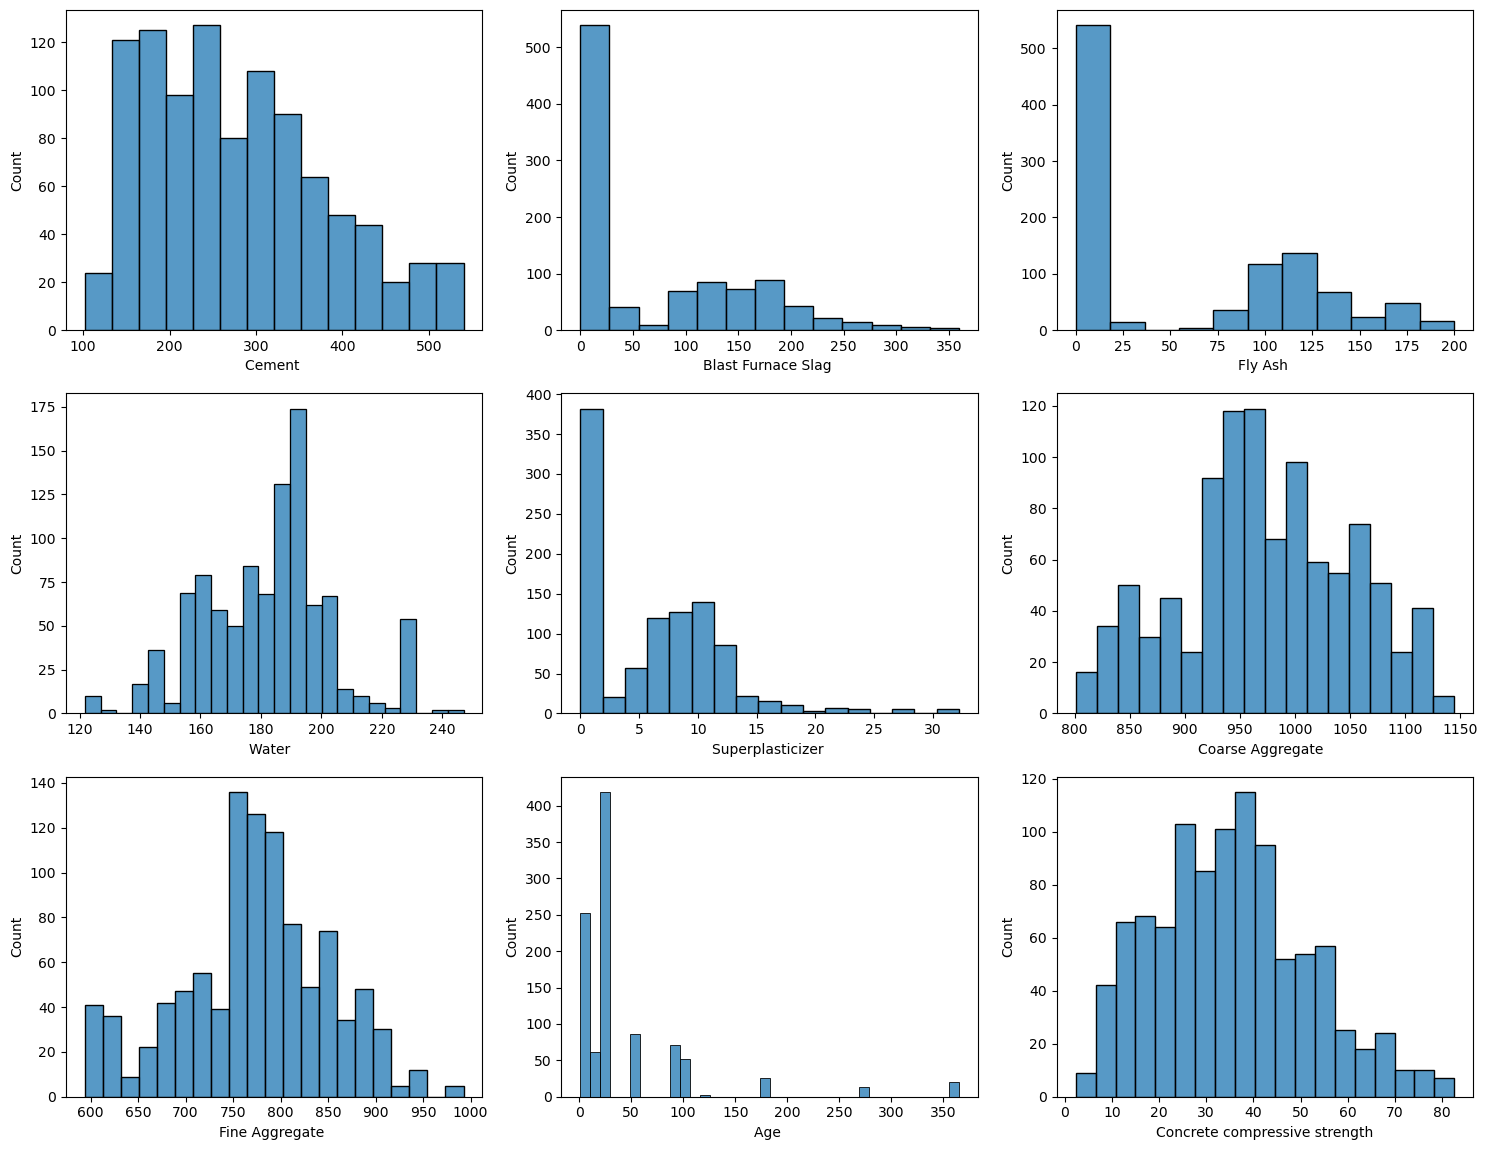

In [50]:
plt.figure(figsize = (15,15), facecolor = 'white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.histplot(df[i])
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

##tight layou--- to remove white spaces

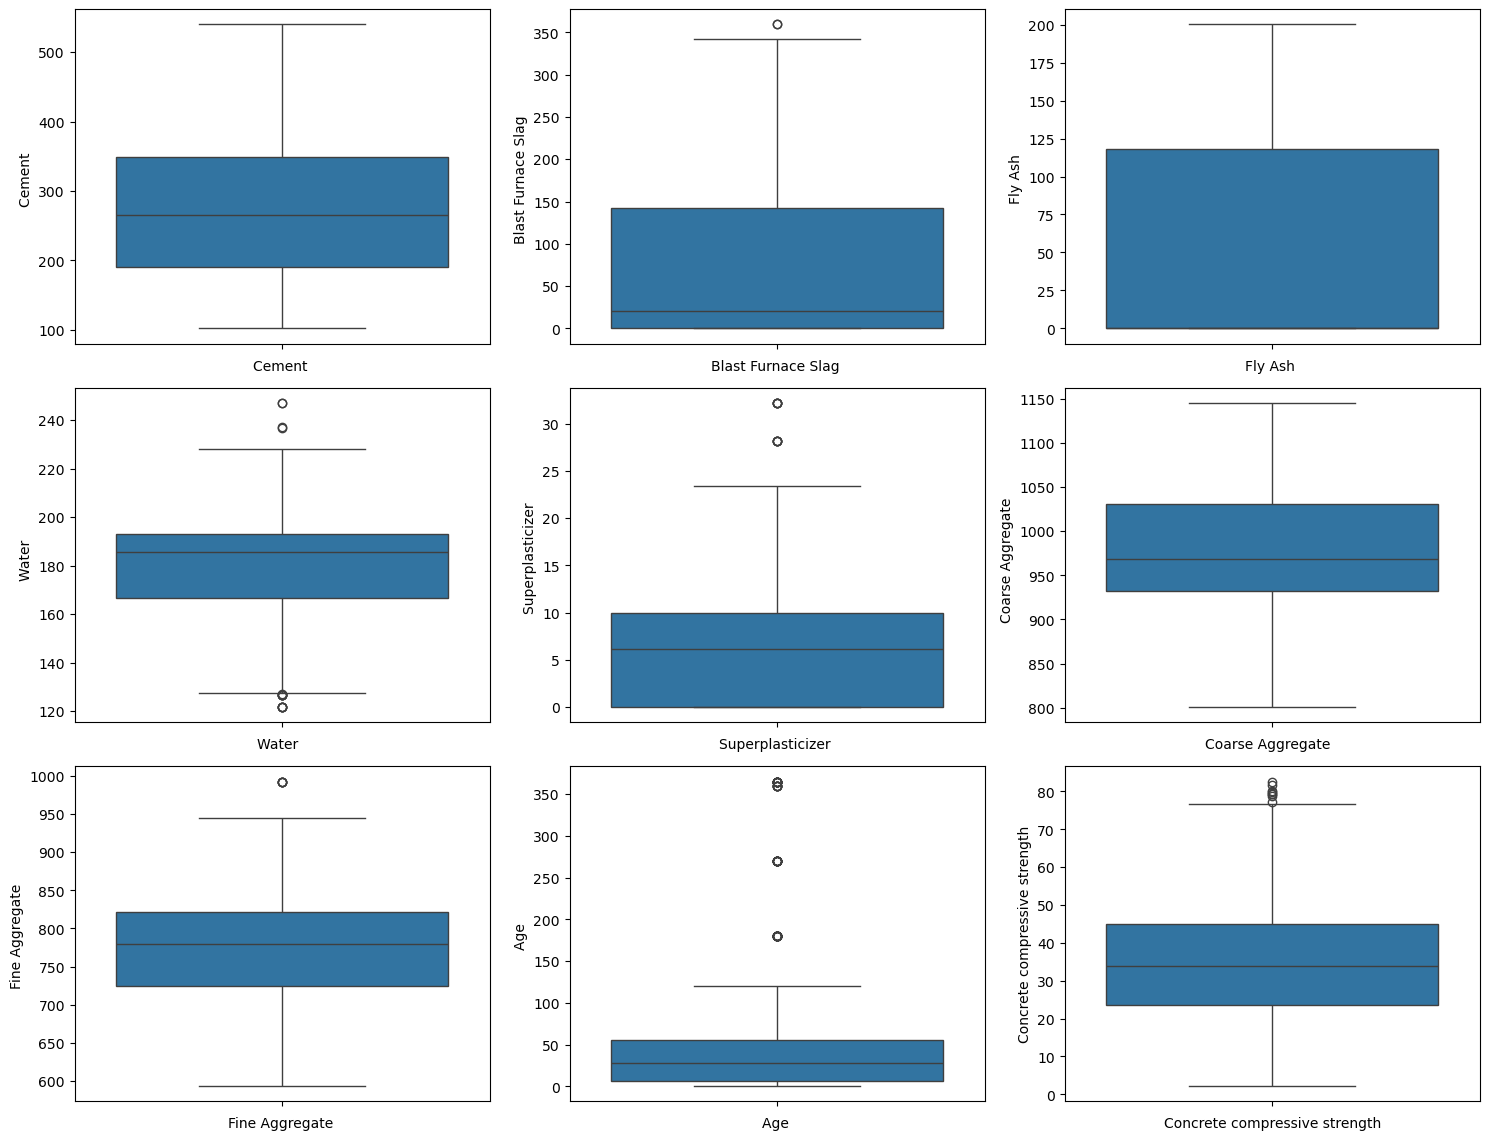

In [54]:
plt.figure(figsize = (15,15), facecolor = 'white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

##tight layout--- to remove white spaces

### We can identify outliers using a method other than box plots by first calculating the first quartile (Q1) and third quartile (Q3), then determining the interquartile range (IQR). Subsequently, we compute the upper and lower bounds. Any data points outside this range can be classified as outliers. Depending on the analysis, outliers can either be removed or adjusted to fit within the upper or lower bounds.

In [57]:
df.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ',
       'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age ',
       'Concrete compressive strength'],
      dtype='object')

In [59]:
outliers = ['Blast Furnace Slag ',"Water  ", "Superplasticizer ", 'Fine Aggregate ', 'Age ']

In [61]:
def outlier_capping(dataframe: pd.DataFrame, outliers:list):
    df = dataframe.copy()
    for i in outliers:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 *iqr
        lower_limit = q3 - 1.5 *iqr
        df.loc[df[i] > upper_limit, i] = upper_limit
        df.loc[df[i] < lower_limit, i] = lower_limit
    return df
df = outlier_capping(dataframe = df, outliers = outliers)

C:\Users\HP\AppData\Local\Temp\ipykernel_36508\3182466808.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] >upper_limit, i] = upper_limit


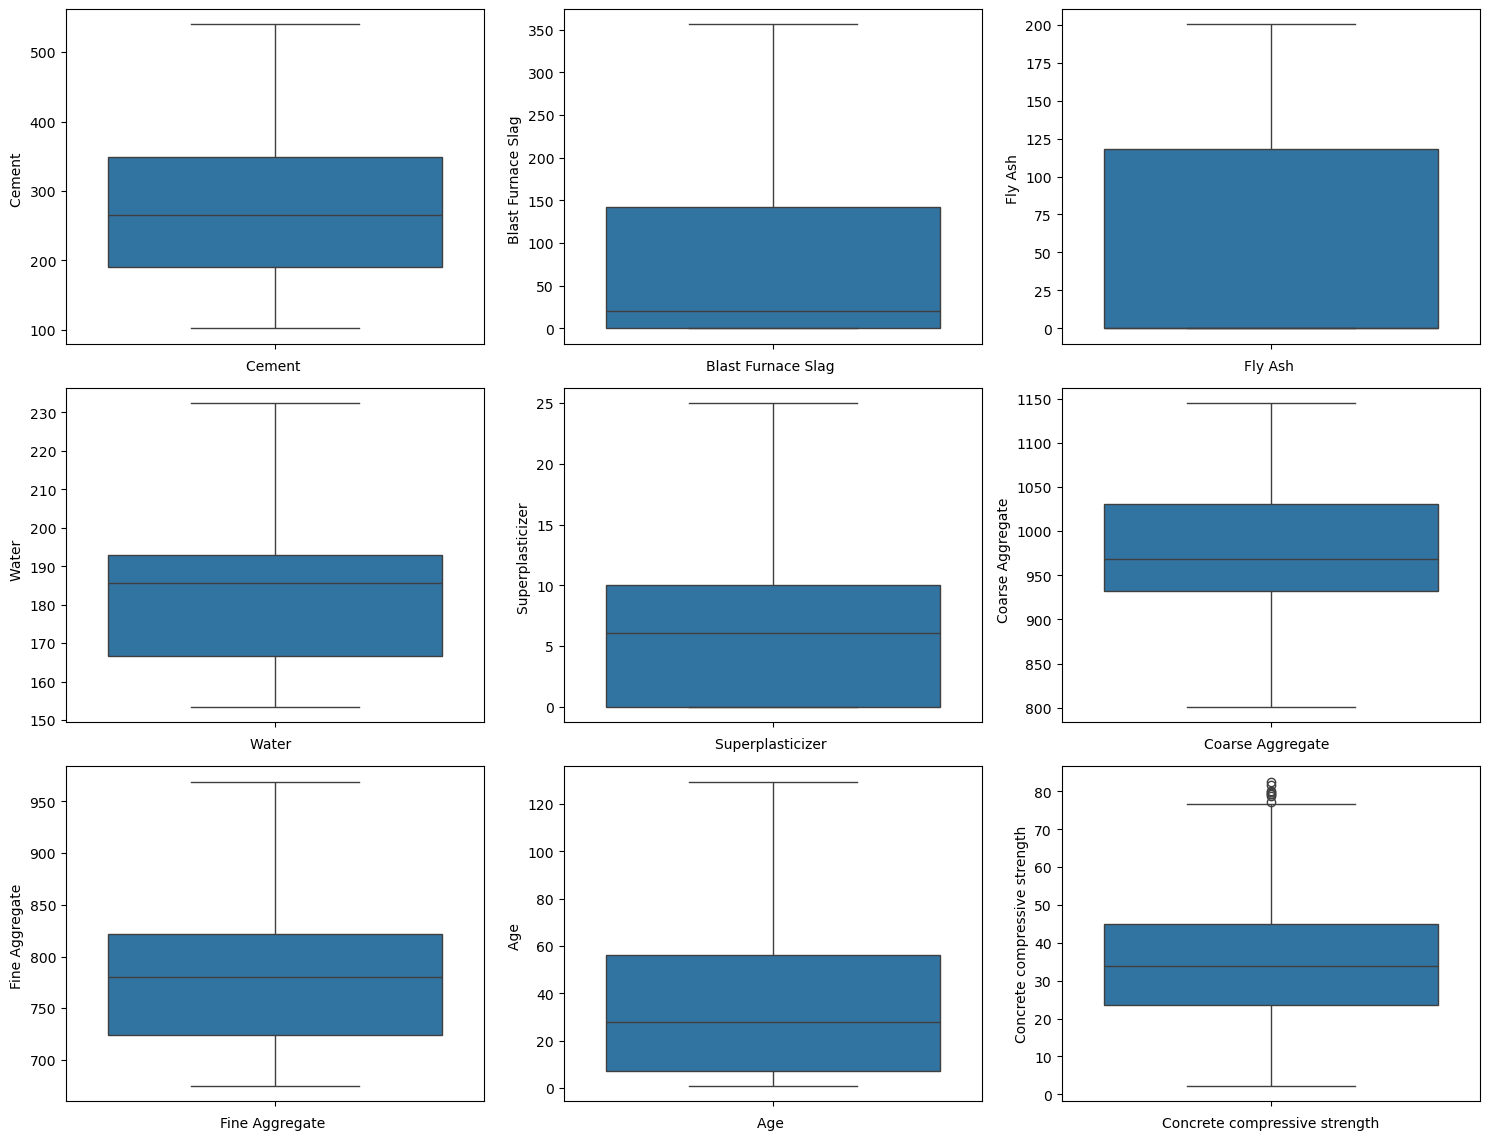

In [63]:
plt.figure(figsize = (15,15), facecolor = 'white')
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize = 10)
    plotnumber +=1
plt.tight_layout()
plt.show()

In [65]:
X = df.drop('Concrete compressive strength', axis =1)
y = df['Concrete compressive strength']

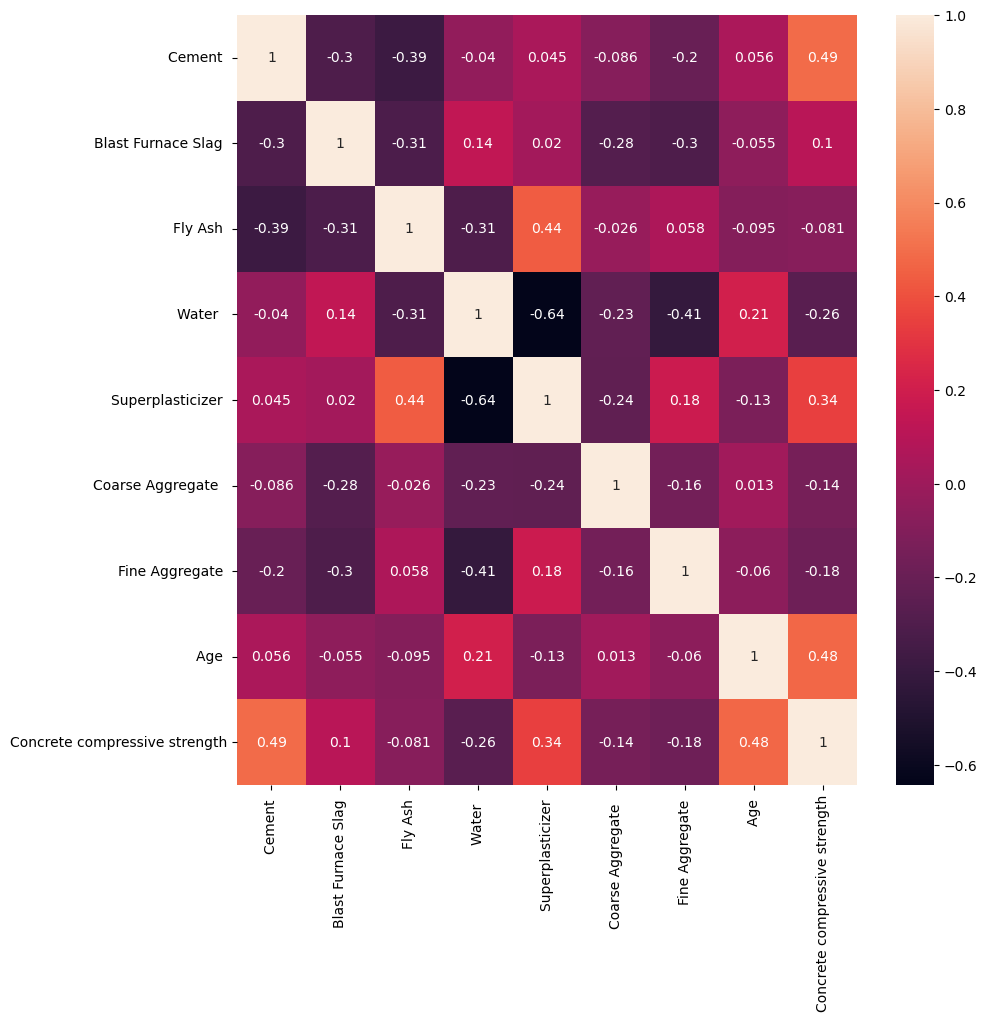

In [67]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [73]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [81]:
def check_model_performance(preprocessor, xtrain, ytrain, xtest, ytest):
    models = {
        "linear Regression": LinearRegression(),
        "Lasso Regression": Lasso(alpha = 1),
        "Ridge Regression": Ridge(alpha = 1),
        "Random Forest Regression": RandomForestRegressor(max_depth= 5, random_state=42,n_estimators=20),
        "Gradient Boosting Regression": GradientBoostingRegressor(learning_rate= 0.1)
    }
    for model_name, model in models.items():
        pipeline = make_pipeline(preprocessor, model)
        pipeline.fit(xtrain, ytrain)
        y_pred = pipeline.predict(xtest)
        mse = mean_squared_error(ytest, y_pred)
        mae = mean_absolute_error(ytest, y_pred)
        r2 = r2_score(ytest, y_pred)
        print(f"{model_name} mean squared error: {mse} \n {model_name} mean absolute error: {mae} \n {model_name} R2 score: {r2:.2f}")
        

In [83]:
preprocessor_01 = make_pipeline(KNNImputer(n_neighbors=3), StandardScaler())
preprocessor_02 = make_pipeline(KNNImputer(n_neighbors=3), MinMaxScaler())
preprocessor_03 = make_pipeline(KNNImputer(n_neighbors=3), RobustScaler())

print(f"{'=' * 10} Result for StandardScaler {'=' *10}")
check_model_performance(preprocessor_01, xtrain, ytrain, xtest, ytest)

print(f"\n{'=' * 10} Result for MinMaxScaler {'=' *10}")
check_model_performance(preprocessor_02, xtrain, ytrain, xtest, ytest)

print(f"\n{'=' * 10} Result for RobustScaler {'=' *10}")
check_model_performance(preprocessor_03, xtrain, ytrain, xtest, ytest)

========== Result for StandardScaler ==========
linear Regression mean squared error: 88.36174044677554 
 linear Regression mean absolute error: 7.126399837571448 
 linear Regression R2 score: 0.69
Lasso Regression mean squared error: 100.03272633952359 
 Lasso Regression mean absolute error: 7.8598586682382265 
 Lasso Regression R2 score: 0.65
Ridge Regression mean squared error: 88.31552612700575 
 Ridge Regression mean absolute error: 7.125328899040133 
 Ridge Regression R2 score: 0.69
Random Forest Regression mean squared error: 54.926852672044454 
 Random Forest Regression mean absolute error: 5.692217391909497 
 Random Forest Regression R2 score: 0.81
Gradient Boosting Regression mean squared error: 34.40111245013571 
 Gradient Boosting Regression mean absolute error: 4.395271242825222 
 Gradient Boosting Regression R2 score: 0.88

========== Result for MinMaxScaler ==========
linear Regression mean squared error: 88.36174044677563 
 linear Regression mean absolute error: 7.12639

## Gradient boosting is performing best in this case

In [86]:
### Hyper paramater Tuning for Grid Search CV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100,200, 50],
             'learning_rate' : [0.1, 0.01],
             'max_depth' : [5,3,7],
             'min_samples_split': [2,4],
             'min_samples_leaf' : [1,2,3]}

gb_rg = GradientBoostingRegressor()

grid = GridSearchCV(gb_rg, param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [5, 3, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [87]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [90]:
grid.best_score_

-22.426456815126556

In [92]:
grid.best_estimator_.score(xtest, ytest)

0.923688713799044

In [108]:
gb_rg_new = GradientBoostingRegressor(learning_rate = 0.1,max_depth = 5, min_samples_leaf = 3,min_samples_split = 2, n_estimators = 200 )

In [110]:
gb_rg_new.fit(xtrain, ytrain)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=3, n_estimators=200)

In [112]:
y_pred2 = gb_rg_new.predict(xtest)

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_pred2)
mae = mean_absolute_error(ytest, y_pred2)
r2 = r2_score(ytest, y_pred2)
print(f"mean squared error: {mse} \nmean absolute error: {mae} \nR2 score: {r2:.2f}")

mean squared error: 21.80631781267044 
mean absolute error: 3.165885599957428 
R2 score: 0.92
